In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu07= pd.read_csv('AHU_07.csv')
ahu07 = ahu07.ffill()
ahu07.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,31-12-2015,00:00:00,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.2
1,31-12-2015,00:05:41,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.8
2,31-12-2015,00:05:52,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.8
3,31-12-2015,00:06:11,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.8
4,31-12-2015,00:06:21,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.8


In [3]:
ahu07.rename(columns={'Column1':'Date','Column2':'Time', 'Column3':'supply fan ON?OFF ', 'Column4':'Cooling coil valve %open','Column5':'Cold Deck temperature'},inplace =1)
ahu07.rename(columns={'Column6':'exhaust fans ON?OFF','Column7':'Hot Deck temperature', 'Column8':'Mixed air damper % open', 'Column9':'Mixed air temperature '},inplace =1)
ahu07.rename(columns={'Column10':'Return air temperature','Column11':'Re-heat coil Discharger value'},inplace =1)
print list(ahu07.columns.values)
ahu07.head()

['Date', 'Time', 'supply fan ON?OFF ', 'Cooling coil valve %open', 'Cold Deck temperature', 'exhaust fans ON?OFF', 'Hot Deck temperature', 'Mixed air damper % open', 'Mixed air temperature ', 'Return air temperature', 'Re-heat coil Discharger value']


,Date,Time,supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed air damper % open,Mixed air temperature,Return air temperature,Re-heat coil Discharger value
0,31-12-2015,00:00:00,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.2
1,31-12-2015,00:05:41,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.8
2,31-12-2015,00:05:52,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.8
3,31-12-2015,00:06:11,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.8
4,31-12-2015,00:06:21,ON,12.0,60.7,ON,79.8,0.0,59.5,69.0,10.8


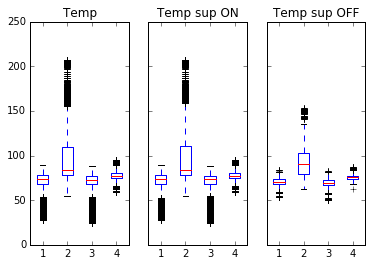

In [11]:
data_temp=[ahu07['Cold Deck temperature'],ahu07['Hot Deck temperature'],ahu07['Mixed air temperature '],
           ahu07['Return air temperature']]
sup_on = ahu07[ahu07['supply fan ON?OFF '].str.contains('ON') ]
sup_off = ahu07[ahu07['supply fan ON?OFF '].str.contains('OFF') ]
data_temp_1 = [sup_on['Cold Deck temperature'],sup_on['Hot Deck temperature'],sup_on['Mixed air temperature '],
           sup_on['Return air temperature']]
data_temp_2 = [sup_off['Cold Deck temperature'],sup_off['Hot Deck temperature'],sup_off['Mixed air temperature '],
           sup_off['Return air temperature']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp sup OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_07']))

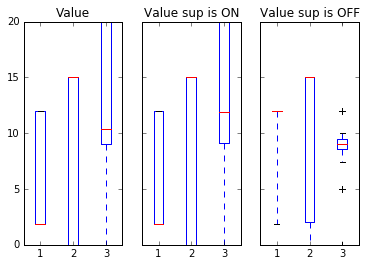

In [10]:
data_value = [ahu07['Cooling coil valve %open'],ahu07['Mixed air damper % open'],ahu07['Re-heat coil Discharger value']]
data_value_1 = [sup_on['Cooling coil valve %open'],sup_on['Mixed air damper % open'],sup_on['Re-heat coil Discharger value']]
data_value_2 = [sup_off['Cooling coil valve %open'],sup_off['Mixed air damper % open'],sup_off['Re-heat coil Discharger value']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value sup is ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value sup is OFF')
#plt.show()
plt.savefig(''.join(['values%','_ahu_07']))

In [8]:
df1 = ahu07.copy()
print ahu07.columns.values
df1 = df1.drop(['Date','Time','supply fan ON?OFF ','exhaust fans ON?OFF'],1)
print df1.columns.values

['Date' 'Time' 'supply fan ON?OFF ' 'Cooling coil valve %open'
 'Cold Deck temperature' 'exhaust fans ON?OFF' 'Hot Deck temperature'
 'Mixed air damper % open' 'Mixed air temperature '
 'Return air temperature' 'Re-heat coil Discharger value']
['Cooling coil valve %open' 'Cold Deck temperature' 'Hot Deck temperature'
 'Mixed air damper % open' 'Mixed air temperature '
 'Return air temperature' 'Re-heat coil Discharger value']


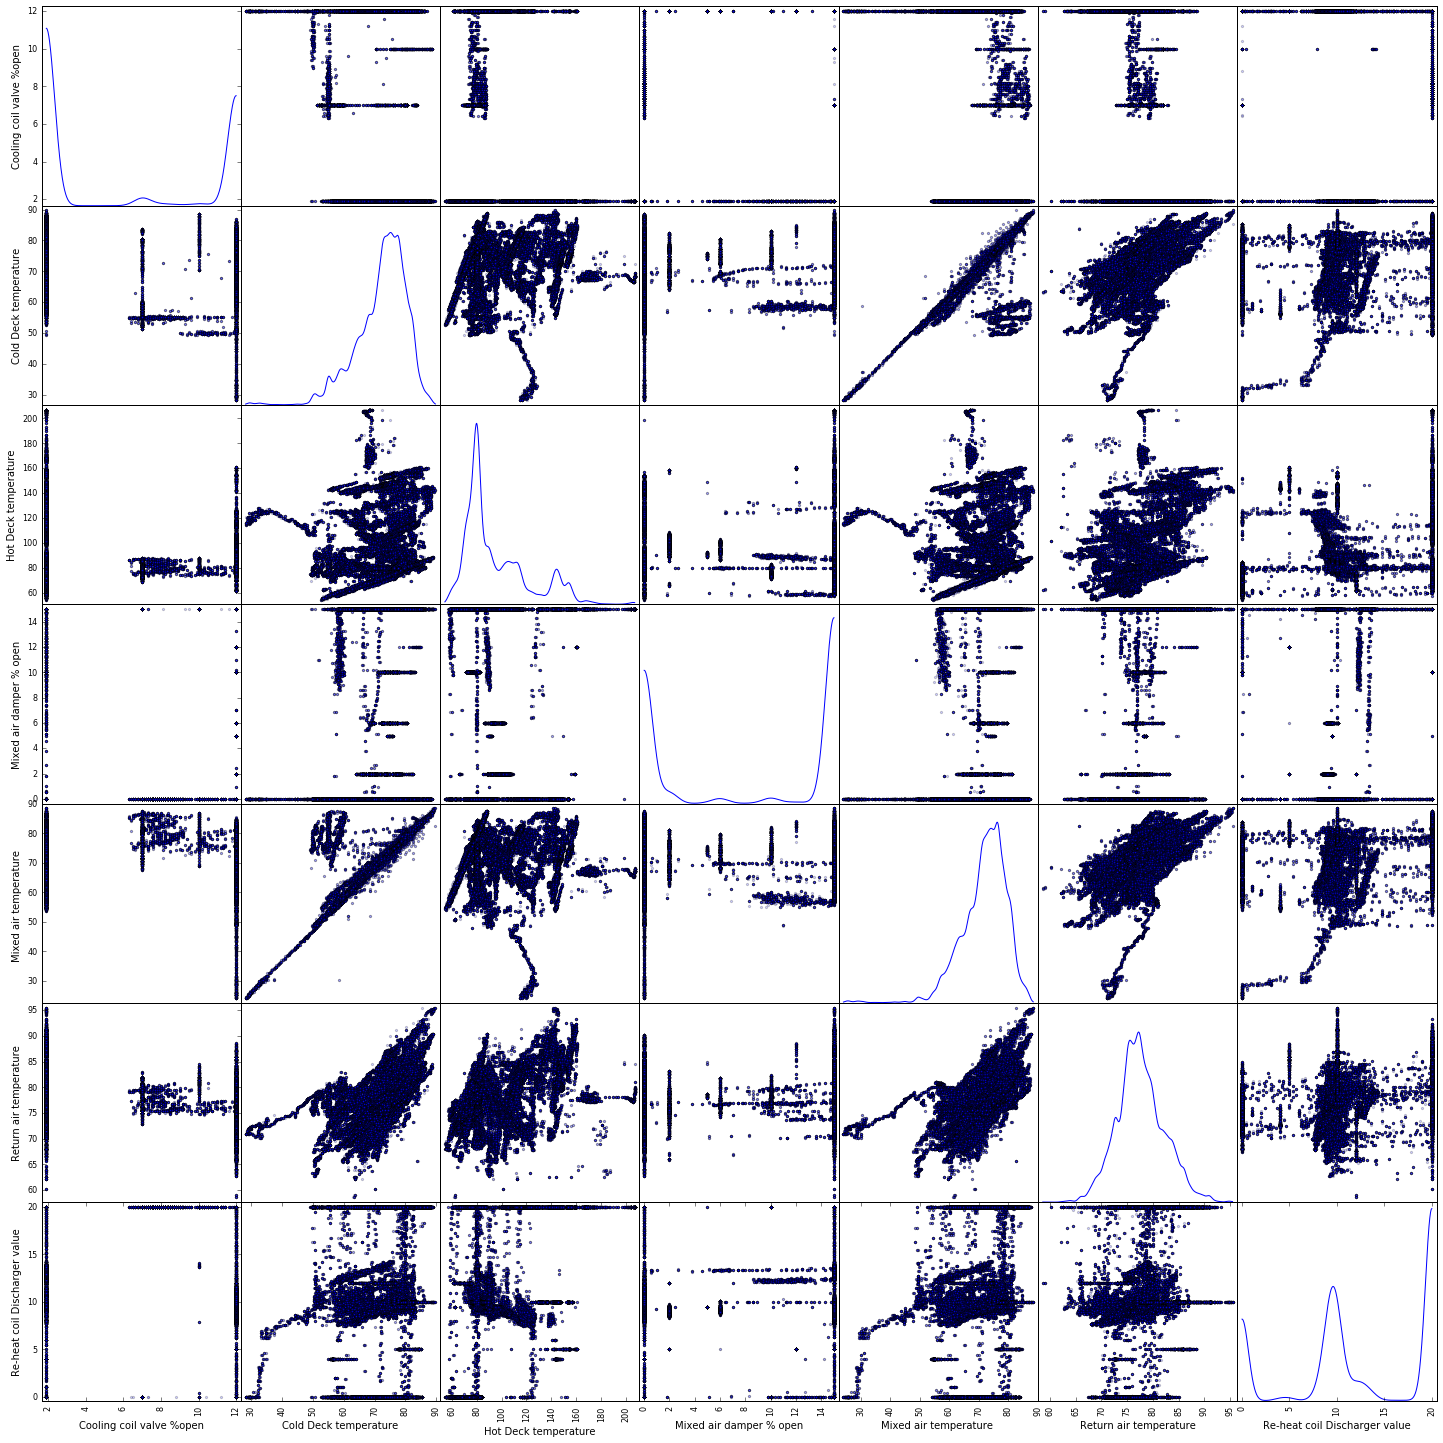

In [7]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize=(25,25), diagonal = 'kde')
plt.savefig(''.join(['bivariate','_ahu_07']))